In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/X_pca_100_y.pickle.npz')
data.files

['arr_0', 'arr_1']

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5377, 100), (1345, 100), (5377,), (1345,))

# Training a Machine Learning Model

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,random_state = 0)

In [8]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [9]:
# score
model.score(x_train,y_train)

0.9494141714710805

In [10]:
# score
model.score(x_test,y_test)

0.8408921933085501

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [11]:
from sklearn import metrics

In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

In [13]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [14]:
y_prob[:,1]

array([0.86896054, 0.98202823, 0.05797718, ..., 0.17410098, 0.93623623,
       0.9362115 ])

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)

<AxesSubplot:>

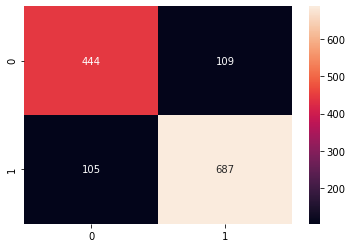

In [16]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt ='d')

In [17]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.808743,0.802893,0.805808,553.000000
female,0.863065,0.867424,0.865239,792.000000
accuracy,0.840892,0.840892,0.840892,0.840892
macro avg,0.835904,0.835159,0.835523,1345.000000
weighted avg,0.840731,0.840892,0.840804,1345.000000


In [18]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.6710499247996562

# ROC and AUC

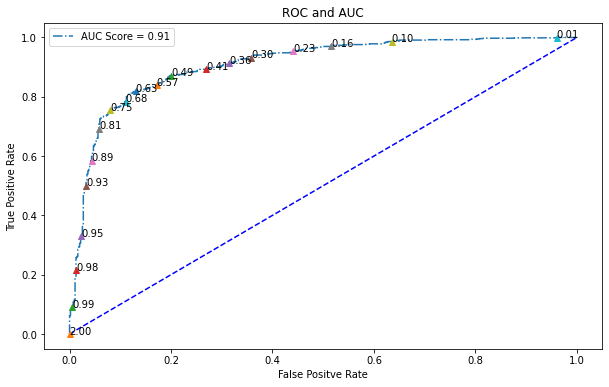

In [19]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.show()

In [20]:
# save our machine learning model
import pickle
pickle.dump(model,open('model_svm_pca100.pickle','wb'))